MAE - средняя абсолютная ошибка - она используется чаще как оценочная метрика, 
так как с ней удобно работать человеку (более понятная - то есть видим число , на которое мы реально отклоняемся. Получили 2,25 убытка - значит вот такая наша ошибка)
Ее часто используют для продуктового анализа
Но в расчетах модели ее не удобно использовать, так как это негладкая функция, поэтому не везде дифференцируемая.

MSE - используется в расчетах, так как ее можно дифференцировать (гладкая функция). Но неудобно человеку (так как среднеквадратичную ошибку сложно представить человеку)



умножение матрицы на столбец


10х0 + 20х1 + 30х2 <=600
7х0 + 15х1 + 20х2 <=300
5х0 + 10х1 + 15х2 <=150



type - тип ограничения
ineq - это знак >=



In [5]:
import numpy as np
from scipy import optimize
from scipy import stats

In [11]:
def value(x):
    return - 10*x[0] - 20*x[1] - 30*x[2]

In [12]:
# сложное ограничение
ineq_cons = {'type' : 'ineq',
            'fun': lambda x: np.array([600 - 10 * x[0] - 20 * x[1] - 30 * x[2],
                                       300 - 7  * x[0] - 15 * x[1] - 20 * x[2],
                                       150 - 5  * x[0] - 10 * x[1] - 15 * x[2]])
            }

In [13]:
# простое ограничение
bnds = optimize.Bounds([0, 0, 0], [np.inf, np.inf, np.inf]) # 3 параметра , поэтому 3 ограничения

In [14]:
x0 = np.array([0, 0, 0])
res = optimize.minimize(value, x0, method='SLSQP', constraints=ineq_cons, bounds=bnds)
print(res)

     fun: -299.9999999998902
     jac: array([-10., -20., -30.])
 message: 'Optimization terminated successfully.'
    nfev: 10
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([2.14285714, 4.28571429, 6.42857143])


fun: -299. -- это максимальное значение нашей целевой функциию. 
Это значит, что мы заработаем 300000 при нашем распределении ресурсов
    
x: array([2.14285714, 4.28571429, 6.42857143])
это оптимальные подобранные значения

надо округлять в меньшую сторону

In [15]:
2 * 10 + 4 * 20 + 6 * 30 

280

!!!!!
всегда нужно определять цель оптимизации

x y problem  - когда стоит задача х, но описывается y проблема. 

## Линейная регрессия 

a1x1 + a2x2 + ... anxn = y

Регрессия ВСЕГДА оптимизирует среднеквадратичную ошибку. 

Минус:
она работает ТОЛЬКО с линейной зависимостью.
например не может построить синусоиду.

Плюс:
практически никогда не переобучается. 
то есть если важно обобщить, а не точно классифицировать, то линейная модель очень хорошо работает.

Линейная модель - это очень хороший старт.
Можно вначале всегда начать с линейной регрессии, а потом переходить к другим алгоритмам

Размен между моделированием реальной природы и обобщением - это как раз задача выбора, которую надо решить аналитику


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)



In [29]:
print('Shape of X is', data['x_train'].shape)
print('Head of X is', data['x_train'][:10])



Shape of X is (250,)
Head of X is [0.         0.         0.0503158  0.06289475 0.06289475 0.06289475
 0.0754737  0.08176317 0.08176317 0.11321055]


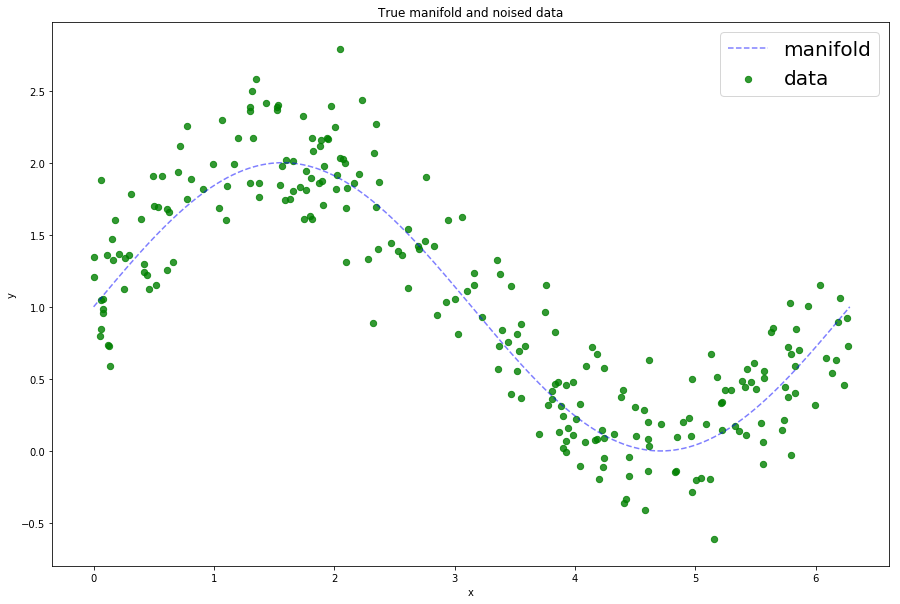

In [31]:
margin = 0.3
fig = plt.figure(figsize=[15, 10])
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
#plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
#plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Полиномиальная регрессия 

может моделировать нелинейную зависимость

чем сложнее функция, тем лучше предсказание, но тем выше вероятность переобучения

In [33]:
data['x_train']

array([0.        , 0.        , 0.0503158 , 0.06289475, 0.06289475,
       0.06289475, 0.0754737 , 0.08176317, 0.08176317, 0.11321055,
       0.11950002, 0.1257895 , 0.13207897, 0.15094739, 0.16352634,
       0.17610529, 0.20755267, 0.25157899, 0.25786847, 0.29560531,
       0.31447374, 0.38994744, 0.41510534, 0.41510534, 0.44655271,
       0.45913166, 0.49057903, 0.50315798, 0.52202641, 0.53460536,
       0.56605273, 0.61007905, 0.61007905, 0.622658  , 0.66039485,
       0.6981317 , 0.71700013, 0.77989487, 0.77989487, 0.80505277,
       0.91197384, 0.99373702, 1.03776334, 1.06921071, 1.10065809,
       1.10694756, 1.16984231, 1.20128968, 1.29563181, 1.29563181,
       1.30192128, 1.31450023, 1.3207897 , 1.35223708, 1.3711055 ,
       1.37739498, 1.43400025, 1.5220529 , 1.5220529 , 1.53463185,
       1.5472108 , 1.56607922, 1.59123712, 1.59752659, 1.62897397,
       1.66042134, 1.66042134, 1.71702662, 1.74218451, 1.74847399,
       1.76734241, 1.76734241, 1.79878979, 1.80507926, 1.81765

In [35]:
data['x_train'].reshape(-1, 1)

array([[0.        ],
       [0.        ],
       [0.0503158 ],
       [0.06289475],
       [0.06289475],
       [0.06289475],
       [0.0754737 ],
       [0.08176317],
       [0.08176317],
       [0.11321055],
       [0.11950002],
       [0.1257895 ],
       [0.13207897],
       [0.15094739],
       [0.16352634],
       [0.17610529],
       [0.20755267],
       [0.25157899],
       [0.25786847],
       [0.29560531],
       [0.31447374],
       [0.38994744],
       [0.41510534],
       [0.41510534],
       [0.44655271],
       [0.45913166],
       [0.49057903],
       [0.50315798],
       [0.52202641],
       [0.53460536],
       [0.56605273],
       [0.61007905],
       [0.61007905],
       [0.622658  ],
       [0.66039485],
       [0.6981317 ],
       [0.71700013],
       [0.77989487],
       [0.77989487],
       [0.80505277],
       [0.91197384],
       [0.99373702],
       [1.03776334],
       [1.06921071],
       [1.10065809],
       [1.10694756],
       [1.16984231],
       [1.201